<div style=" background-color: RGB(0,114,200);" >
<h1 style="margin: auto; padding: 20px 0; color:#fff; text-align: center">PROJET 4 DATA ANALYST</h1>
<h2 style="margin: auto; padding: 20px 0; color:#fff; text-align: center">Réalisez une étude de santé publique avec R ou Python
</h2>
</div>

# OBJECTIF DE CE NOTEBOOK

Bienvenue dans l'outil plébiscité par les analystes de données Jupyter.

Il s'agit d'un outil permettant de mixer et d'alterner codes, textes et graphique.

Cet outil est formidable pour plusieurs raisons:

+ il permet de tester des lignes de codes au fur et à mesure de votre rédaction, de constater immédiatement le résultat d'un instruction, de la corriger si nécessaire.
+ De rédiger du texte pour expliquer l'approche suivie ou les résultats d'une analyse et de le mettre en forme grâce à du code html ou plus simple avec **Markdown**
+ d'agrémenter de graphiques

Pour vous aider dans vos premiers pas à l'usage de Jupyter et de Python, nous avons rédigé ce notebook en vous indiquant les instructions à suivre.

Il vous suffit pour cela de saisir le code Python répondant à l'instruction donnée.

Vous verrez de temps à autre le code Python répondant à une instruction donnée mais cela est fait pour vous aider à comprendre la nature du travail qui vous est demandée.

Et garder à l'esprit, qu'il n'y a pas de solution unique pour résoudre un problème et qu'il y a autant de résolutions de problèmes que de développeurs ;)...



Note jeremy
Est ce qu'il faut faire le calcul de la sous nutrition sur les pays qu'on a ?
Est ce qu'il faut faire des graphiques ?
Rajouter le soja
La liste des céréales est difficile a trouver ...

<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 1 - Importation des librairies et chargement des fichiers</h2>
</div>

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">1.1 - Importation des librairies</h3>
</div>

In [1]:
#Importation de la librairie Pandas
import pandas as pd

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">1.2 - Chargement des fichiers Excel</h3>
</div>

In [2]:
#Importation du fichier population.csv
population = pd.read_csv('/content/population.csv')

#Importation du fichier dispo_alimentaire.csv
dispo_alimentaire = pd.read_csv('/content/dispo_alimentaire.csv')

#Importation du fichier aide_alimentaire.csv
aide_alimentaire = pd.read_csv('/content/aide_alimentaire.csv')

#Importation du fichier sous_nutrition.csv
sous_nutrition = pd.read_csv('/content/sous_nutrition.csv')

<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 2 - Analyse exploratoire des fichiers</h2>
</div>

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.1 - Analyse exploratoire du fichier population</h3>
</div>

In [3]:
#Analyse complémentaire 1 : Aperçu statistiques descriptives pour toutes les colonnes
population.describe(include='all')

,Zone,Année,Valeur
count,1416,1416.000000,1.416000e+03
unique,236,NaN,NaN
top,Afghanistan,NaN,NaN
freq,6,NaN,NaN
mean,NaN,2015.500000,3.144793e+04
std,NaN,1.708428,1.300812e+05
min,NaN,2013.000000,7.930000e-01
25%,NaN,2014.000000,3.783410e+02
50%,NaN,2015.500000,5.126480e+03
75%,NaN,2017.000000,1.930666e+04


In [4]:
#Analyse complémentaire 2 :
#Affiche les dimentions, le type de données et le nombre de valeurs non nulles de chaque colonne.
population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1416 entries, 0 to 1415
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Zone    1416 non-null   object 
 1   Année   1416 non-null   int64  
 2   Valeur  1416 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 33.3+ KB


In [5]:
#Afficher les dimensions du dataset
dimensionspop = population.shape
print("Dimensions du dataset population.cvs :", dimensionspop)
print("\t")
print("Le tableau comporte {} observation(s) ou ligne(s)".format(population.shape[0]))
print("Le tableau comporte {} variable(s) ou colonne(s)".format(population.shape[1]))

Dimensions du dataset population.cvs : (1416, 3)
	
Le tableau comporte 1416 observation(s) ou ligne(s)
Le tableau comporte 3 variable(s) ou colonne(s)


In [6]:
#Consulter le nombre de colonnes
print(population.shape[1])
#La nature des données dans chacune des colonnes
print(type(population.shape[1]))
#Le nombre de valeurs présentes dans chacune des colonnes
print(population.shape[0])

3
<class 'int'>
1416


In [7]:
#Affichage les 5 premières lignes de la table
population.head(5)


,Zone,Année,Valeur
0,Afghanistan,2013,32269.589
1,Afghanistan,2014,33370.794
2,Afghanistan,2015,34413.603
3,Afghanistan,2016,35383.032
4,Afghanistan,2017,36296.113


In [8]:
#Nous allons harmoniser les unités. Pour cela, nous avons décidé de multiplier la population par 1000
#Multiplication de la colonne valeur par 1000
population['Valeur'] *= 1000

In [9]:
#changement du nom de la colonne Valeur par Population
population.rename(columns={'Valeur': 'Population'}, inplace=True)

In [10]:
#Affichage les 5 premières lignes de la table pour voir les modifications
print(population.head(5))

          Zone  Année  Population
0  Afghanistan   2013  32269589.0
1  Afghanistan   2014  33370794.0
2  Afghanistan   2015  34413603.0
3  Afghanistan   2016  35383032.0
4  Afghanistan   2017  36296113.0


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.2 - Analyse exploratoire du fichier disponibilité alimentaire</h3>
</div>

In [11]:
#Analyse complémentaire 1 : Aperçu statistiques descriptives pour toutes les colonnes
dispo_alimentaire.describe(include='all')

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
count,15605,15605,15605,2720.000000,5496.000000,14241.000000,14015.000000,11794.000000,11561.000000,15382.000000,12226.000000,14852.000000,14015.000000,4278.000000,9180.000000,2091.000000,2292.000000,6776.000000
unique,174,98,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Inde,Abats Comestible,vegetale,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,97,174,11896,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,479.501838,157.391376,34.789832,8.719368,1.283111,1.223608,640.293460,110.596925,87.264543,347.931359,106.053763,1090.379085,73.974653,961.905323,-15.407615
std,NaN,NaN,NaN,4240.119637,5076.785816,107.287655,24.618223,3.680399,3.598686,9067.267153,1053.318990,717.372714,4475.704458,1113.100416,12067.344094,528.069224,10381.795904,549.834540
min,NaN,NaN,NaN,0.000000,0.000000,-21.000000,-1.930000,-0.030000,-0.370000,-3430.000000,-41.000000,-201.000000,-246.000000,0.000000,0.000000,0.000000,-19.000000,-39863.000000
25%,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.060000,0.010000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000
50%,NaN,NaN,NaN,4.000000,0.000000,4.000000,0.830000,0.080000,0.100000,7.000000,0.000000,2.000000,5.000000,4.000000,22.000000,2.000000,6.000000,0.000000
75%,NaN,NaN,NaN,74.000000,4.000000,21.000000,5.190000,0.630000,0.660000,76.750000,9.000000,18.000000,52.000000,26.000000,191.250000,17.000000,69.000000,0.000000


In [12]:
#Analyse complémentaire 2 :
#Affiche les dimentions, le type de données et le nombre de valeurs non nulles de chaque colonne.
dispo_alimentaire.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15605 entries, 0 to 15604
Data columns (total 18 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   Zone                                                           15605 non-null  object 
 1   Produit                                                        15605 non-null  object 
 2   Origine                                                        15605 non-null  object 
 3   Aliments pour animaux                                          2720 non-null   float64
 4   Autres Utilisations                                            5496 non-null   float64
 5   Disponibilité alimentaire (Kcal/personne/jour)                 14241 non-null  float64
 6   Disponibilité alimentaire en quantité (kg/personne/an)         14015 non-null  float64
 7   Disponibilité de matière grasse en quantité (g/personne/jo

In [13]:
#Afficher les dimensions du dataset
dimensionsdis = dispo_alimentaire.shape
print("Dimensions du dataset dispo_alimentaire :", dimensionsdis)
print("\t")
print("Le tableau comporte {} observation(s) ou ligne(s)".format(dispo_alimentaire.shape[0]))
print("Le tableau comporte {} variable(s) ou colonne(s)".format(dispo_alimentaire.shape[1]))

Dimensions du dataset dispo_alimentaire : (15605, 18)
	
Le tableau comporte 15605 observation(s) ou ligne(s)
Le tableau comporte 18 variable(s) ou colonne(s)


In [14]:
#Consulter le nombre de colonnes
nombre_colonnes = dispo_alimentaire.shape[1]
print("Nombre de colonnes :", nombre_colonnes)

Nombre de colonnes : 18


In [15]:
#Affichage les 5 premières lignes de la table
dispo_alimentaire.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,NaN,NaN,5.0,1.72,0.20,0.77,53.0,NaN,NaN,53.0,NaN,53.0,NaN,NaN,NaN
1,Afghanistan,"Agrumes, Autres",vegetale,NaN,NaN,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,NaN,NaN,NaN
2,Afghanistan,Aliments pour enfants,vegetale,NaN,NaN,1.0,0.06,0.01,0.03,2.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,Ananas,vegetale,NaN,NaN,0.0,0.00,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,Bananes,vegetale,NaN,NaN,4.0,2.70,0.02,0.05,82.0,NaN,82.0,82.0,NaN,NaN,NaN,NaN,NaN


In [16]:
#remplacement des NaN dans le dataset par des 0
dispo_alimentaire.fillna(0, inplace=True)

In [17]:
# Noms des colonnes contenant des milliers de tonnes
nom_des_colonnes = ['Aliments pour animaux',
                    'Autres Utilisations',
                    'Disponibilité intérieure',
                    'Exportations - Quantité',
                    'Importations - Quantité',
                    'Nourriture',
                    'Pertes',
                    'Production',
                    'Semences',
                    'Traitement',
                    'Variation de stock']


# Multiplication par 1000 des valeurs dans les colonnes spécifiées
# Le choix du nom "elt" est une convention utilisée pour représenter un élément générique dans une séquence
for elt in nom_des_colonnes :
  dispo_alimentaire[elt] *= 1000

# Affiche les 10 premières lignes qui ont subi une modification
dispo_alimentaire[nom_des_colonnes].head(10)

,Aliments pour animaux,Autres Utilisations,Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,0.0,0.0,53000.0,0.0,0.0,53000.0,0.0,53000.0,0.0,0.0,0.0
1,0.0,0.0,41000.0,2000.0,40000.0,39000.0,2000.0,3000.0,0.0,0.0,0.0
2,0.0,0.0,2000.0,0.0,2000.0,2000.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,82000.0,0.0,82000.0,82000.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,36000.0,0.0,0.0,36000.0,0.0,36000.0,0.0,0.0,0.0
6,0.0,0.0,3000.0,0.0,3000.0,3000.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,5992000.0,0.0,1173000.0,4895000.0,775000.0,5169000.0,322000.0,0.0,-350000.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
#Affichage les 5 premières lignes de la table
dispo_alimentaire.head(5)

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,0.0,0.0,5.0,1.72,0.20,0.77,53000.0,0.0,0.0,53000.0,0.0,53000.0,0.0,0.0,0.0
1,Afghanistan,"Agrumes, Autres",vegetale,0.0,0.0,1.0,1.29,0.01,0.02,41000.0,2000.0,40000.0,39000.0,2000.0,3000.0,0.0,0.0,0.0
2,Afghanistan,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,0.01,0.03,2000.0,0.0,2000.0,2000.0,0.0,0.0,0.0,0.0,0.0
3,Afghanistan,Ananas,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Afghanistan,Bananes,vegetale,0.0,0.0,4.0,2.70,0.02,0.05,82000.0,0.0,82000.0,82000.0,0.0,0.0,0.0,0.0,0.0


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.3 - Analyse exploratoire du fichier aide alimentaire</h3>
</div>

In [19]:
#Analyse complémentaire 1 : Aperçu statistiques descriptives pour toutes les colonnes
aide_alimentaire.describe(include='all')

,Pays bénéficiaire,Année,Produit,Valeur
count,1475,1475.000000,1475,1475.000000
unique,76,NaN,16,NaN
top,Algérie,NaN,Non-céréales,NaN
freq,39,NaN,220,NaN
mean,NaN,2014.054237,NaN,7481.966780
std,NaN,0.946916,NaN,23339.531424
min,NaN,2013.000000,NaN,0.000000
25%,NaN,2013.000000,NaN,287.500000
50%,NaN,2014.000000,NaN,1178.000000
75%,NaN,2015.000000,NaN,4334.500000


In [20]:
#Analyse complémentaire 2 :
#Affiche les dimentions, le type de données et le nombre de valeurs non nulles de chaque colonne.
aide_alimentaire.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1475 entries, 0 to 1474
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Pays bénéficiaire  1475 non-null   object
 1   Année              1475 non-null   int64 
 2   Produit            1475 non-null   object
 3   Valeur             1475 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 46.2+ KB


In [21]:
#Afficher les dimensions du dataset
dimensionsaid = aide_alimentaire.shape
print("Dimensions du dataset aide_alimentaire.cvs :", dimensionsaid)
print("\t")
print("Le tableau comporte {} observation(s) ou ligne(s)".format(aide_alimentaire.shape[0]))
print("Le tableau comporte {} variable(s) ou colonne(s)".format(aide_alimentaire.shape[1]))

Dimensions du dataset aide_alimentaire.cvs : (1475, 4)
	
Le tableau comporte 1475 observation(s) ou ligne(s)
Le tableau comporte 4 variable(s) ou colonne(s)


In [22]:
#Consulter le nombre de colonnes
print("Le tableau comporte {} variable(s) ou colonne(s)".format(aide_alimentaire.shape[1]))

Le tableau comporte 4 variable(s) ou colonne(s)


In [23]:
#Affichage les 5 premières lignes de la table
aide_alimentaire.head(5)

,Pays bénéficiaire,Année,Produit,Valeur
0,Afghanistan,2013,Autres non-céréales,682
1,Afghanistan,2014,Autres non-céréales,335
2,Afghanistan,2013,Blé et Farin,39224
3,Afghanistan,2014,Blé et Farin,15160
4,Afghanistan,2013,Céréales,40504


In [24]:
#Changement du nom de la colonne Pays bénéficiaire par Zone
aide_alimentaire.rename(columns={'Pays bénéficiaire': 'Zone'}, inplace=True)

In [25]:
#Changement du nom de la colonne Valeur par aide_alimentaire
aide_alimentaire.rename(columns={'Valeur': 'aide_alimentaire'}, inplace=True)

In [26]:
#Multiplication de la colonne Aide_alimentaire qui contient des tonnes par 1000 pour avoir des kg

aide_alimentaire['aide_alimentaire'] *= 1000

In [27]:
#Affichage les 5 premières lignes de la table
aide_alimentaire.head(5)

,Zone,Année,Produit,aide_alimentaire
0,Afghanistan,2013,Autres non-céréales,682000
1,Afghanistan,2014,Autres non-céréales,335000
2,Afghanistan,2013,Blé et Farin,39224000
3,Afghanistan,2014,Blé et Farin,15160000
4,Afghanistan,2013,Céréales,40504000


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.3 - Analyse exploratoire du fichier sous nutrition</h3>
</div>

In [28]:
#Afficher les dimensions du dataset
dimensionssou = sous_nutrition.shape
print("Dimensions du dataset sous_nutrition.cvs :", dimensionssou)
print("\t")
print("Le tableau comporte {} observation(s) ou ligne(s)".format(sous_nutrition.shape[0]))
print("Le tableau comporte {} variable(s) ou colonne(s)".format(sous_nutrition.shape[1]))

Dimensions du dataset sous_nutrition.cvs : (1218, 3)
	
Le tableau comporte 1218 observation(s) ou ligne(s)
Le tableau comporte 3 variable(s) ou colonne(s)


In [29]:
#Consulter le nombre de colonnes
print("Le tableau comporte {} variable(s) ou colonne(s)".format(sous_nutrition.shape[1]))

Le tableau comporte 3 variable(s) ou colonne(s)


In [30]:
#Analyse complémentaire 2 :
#Affiche les dimentions, le type de données et le nombre de valeurs non nulles de chaque colonne.
sous_nutrition.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Zone    1218 non-null   object
 1   Année   1218 non-null   object
 2   Valeur  624 non-null    object
dtypes: object(3)
memory usage: 28.7+ KB


In [31]:
#Analyse complémentaire 1 : Aperçu statistiques descriptives pour toutes les colonnes
sous_nutrition.describe(include = 'all')

,Zone,Année,Valeur
count,1218,1218,624
unique,203,6,139
top,Afghanistan,2012-2014,<0.1
freq,6,203,120


In [32]:
#Afficher les 5 premières lignes de la table
sous_nutrition.head(5)

,Zone,Année,Valeur
0,Afghanistan,2012-2014,8.6
1,Afghanistan,2013-2015,8.8
2,Afghanistan,2014-2016,8.9
3,Afghanistan,2015-2017,9.7
4,Afghanistan,2016-2018,10.5


In [33]:
#Conversion de la colonne sous nutrition en numérique
sous_nutrition['Valeur'] = pd.to_numeric(sous_nutrition['Valeur'],errors='coerce')

In [34]:
#Conversion de la colonne (avec l'argument errors=coerce qui permet de convertir automatiquement les lignes qui ne sont pas des nombres en NaN)
pd.to_numeric(sous_nutrition['Valeur'],errors='coerce')

#Puis remplacement des NaN en 0
sous_nutrition.fillna(0, inplace=True)

In [35]:
#changement du nom de la colonne Valeur par sous_nutrition
sous_nutrition.rename(columns={'Valeur': 'sous_nutrition'}, inplace=True)

In [36]:
# Multiplication de la colonne 'sous_nutrition' par 1,000,000
sous_nutrition['sous_nutrition'] *= 1000000

# Affichage des premières lignes après la multiplication
print(sous_nutrition.head())

          Zone      Année  sous_nutrition
0  Afghanistan  2012-2014       8600000.0
1  Afghanistan  2013-2015       8800000.0
2  Afghanistan  2014-2016       8900000.0
3  Afghanistan  2015-2017       9700000.0
4  Afghanistan  2016-2018      10500000.0


In [37]:
#Afficher les 5 premières lignes de la table
sous_nutrition.head()

,Zone,Année,sous_nutrition
0,Afghanistan,2012-2014,8600000.0
1,Afghanistan,2013-2015,8800000.0
2,Afghanistan,2014-2016,8900000.0
3,Afghanistan,2015-2017,9700000.0
4,Afghanistan,2016-2018,10500000.0


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.1 - Proportion de personnes en sous nutrition</h3>
</div>

In [38]:
# Il faut tout d'abord faire une jointure entre la table population et la table sous nutrition, en ciblant l'année 2017

# Création la table 'pop2017' en ciblant l'année 2017 de la table population
pop2017=population[population['Année']==2017]

# Création la table 'sou2017' en ciblant l'année 2017 de la table sous_nutrition
sou2017=sous_nutrition[sous_nutrition['Année']=='2016-2018']

# Réalisation de la jointure entre le data frame pop2017 et sou2017
prop2017=pd.merge(pop2017,sou2017, on=['Zone'])

In [39]:
#Affichage du dataset
prop2017.head()

,Zone,Année_x,Population,Année_y,sous_nutrition
0,Afghanistan,2017,36296113.0,2016-2018,10500000.0
1,Afrique du Sud,2017,57009756.0,2016-2018,3100000.0
2,Albanie,2017,2884169.0,2016-2018,100000.0
3,Algérie,2017,41389189.0,2016-2018,1300000.0
4,Allemagne,2017,82658409.0,2016-2018,0.0


In [40]:
#Calcul et affichage du nombre de personnes en état de sous nutrition

# Calcul du pourcentage de personnes en état de sous-nutrition dans une nouvelle colonne
prop2017['proportion de personnes en état de sous-nutrition (%)'] = prop2017['sous_nutrition'] / prop2017['Population']

#Affichage du dataset
prop2017

,Zone,Année_x,Population,Année_y,sous_nutrition,proportion de personnes en état de sous-nutrition (%)
0,Afghanistan,2017,36296113.0,2016-2018,10500000.0,0.289287
1,Afrique du Sud,2017,57009756.0,2016-2018,3100000.0,0.054377
2,Albanie,2017,2884169.0,2016-2018,100000.0,0.034672
3,Algérie,2017,41389189.0,2016-2018,1300000.0,0.031409
4,Allemagne,2017,82658409.0,2016-2018,0.0,0.000000
...,...,...,...,...,...,...
198,Venezuela (République bolivarienne du),2017,29402484.0,2016-2018,8000000.0,0.272086
199,Viet Nam,2017,94600648.0,2016-2018,6500000.0,0.068710
200,Yémen,2017,27834819.0,2016-2018,0.0,0.000000
201,Zambie,2017,16853599.0,2016-2018,0.0,0.000000


In [41]:
# Calcul des proportion de personnes en état de sous-nutrition mondial

PopulationTotal = prop2017["Population"].sum()
SousnuttritionTotal = prop2017["sous_nutrition"].sum()


PopulationTotalSous = (SousnuttritionTotal/PopulationTotal)*100

SousnuttritionMillions = SousnuttritionTotal / 1000000
PopulationTotalMilliard = PopulationTotal / 1000000000

# Affichage du nombre de personnes en état de sous-nutrition et limiter à 2 chiffres après la virgule avec '% .2f'
print("Proportion minimal mondiale de personne en état de sous nutrition est de",'% .2f' % PopulationTotalSous,"% en 2017 \n" ,"soit",SousnuttritionMillions,"million de personnes en état de sous nutrition pour une population total de",'% .3f'%PopulationTotalMilliard,"milliards de personnes" )

Proportion minimal mondiale de personne en état de sous nutrition est de  7.10 % en 2017 
 soit 535.7 million de personnes en état de sous nutrition pour une population total de  7.544 milliards de personnes


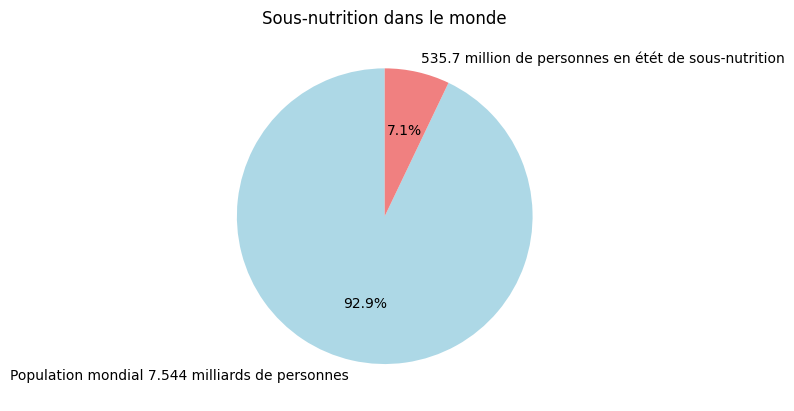

In [42]:
#Mise en forme des résultats via une représentation graphique

import matplotlib.pyplot as plt

# Valeurs
valeur1 = 92.90
valeur2 = 7.10

# Labels
labels = ['Population mondial 7.544 milliards de personnes', '535.7 million de personnes en étét de sous-nutrition']

# Couleurs
couleurs = ['lightblue', 'lightcoral']

# Tracé du diagramme circulaire
plt.pie([valeur1, valeur2], labels=labels,autopct='%1.1f%%', colors=couleurs, startangle=90)

# Ajout d'un titre
plt.title('Sous-nutrition dans le monde')

# Affichage du diagramme
plt.show()

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.2 - Nombre théorique de personne qui pourrait être nourries</h3>
</div>

In [43]:
#Combien mange en moyenne un être humain ?

# Selon J.-P. Charvet, la ration alimentaire moyenne nécessaire est de 2 500 cal/personne/jour.
#Source =>https://fr.wikipedia.org/wiki/Ration_alimentaire

# Je defini une variable "Besoin" pour égale à 2500 calories par jour

Besoin = 2500


print("Un être humain mange en moyenne" ,Besoin, "cal/jour")

Un être humain mange en moyenne 2500 cal/jour


In [44]:
#On commence par faire une jointure entre le data frame population et Dispo_alimentaire afin d'ajouter dans ce dernier la population
#Jointure entre le data frame dispo_alimentaire et pop2017
Pop_a_nour=pd.merge(dispo_alimentaire,pop2017,how='inner', on=['Zone', 'Zone'])

In [45]:
#Affichage du nouveau dataframe
Pop_a_nour

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,Année,Population
0,Afghanistan,Abats Comestible,animale,0.0,0.0,5.0,1.72,0.20,0.77,53000.0,0.0,0.0,53000.0,0.0,53000.0,0.0,0.0,0.0,2017,36296113.0
1,Afghanistan,"Agrumes, Autres",vegetale,0.0,0.0,1.0,1.29,0.01,0.02,41000.0,2000.0,40000.0,39000.0,2000.0,3000.0,0.0,0.0,0.0,2017,36296113.0
2,Afghanistan,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,0.01,0.03,2000.0,0.0,2000.0,2000.0,0.0,0.0,0.0,0.0,0.0,2017,36296113.0
3,Afghanistan,Ananas,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2017,36296113.0
4,Afghanistan,Bananes,vegetale,0.0,0.0,4.0,2.70,0.02,0.05,82000.0,0.0,82000.0,82000.0,0.0,0.0,0.0,0.0,0.0,2017,36296113.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15411,Îles Salomon,Viande de Suides,animale,0.0,0.0,45.0,4.70,4.28,1.41,3000.0,0.0,0.0,3000.0,0.0,2000.0,0.0,0.0,0.0,2017,636039.0
15412,Îles Salomon,Viande de Volailles,animale,0.0,0.0,11.0,3.34,0.69,1.14,2000.0,0.0,2000.0,2000.0,0.0,0.0,0.0,0.0,0.0,2017,636039.0
15413,Îles Salomon,"Viande, Autre",animale,0.0,0.0,0.0,0.06,0.00,0.04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2017,636039.0
15414,Îles Salomon,Vin,vegetale,0.0,0.0,0.0,0.07,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2017,636039.0


In [46]:
#Création de la colonne dispo_cal
Pop_a_nour["dispo_cal"] = Pop_a_nour["Disponibilité alimentaire (Kcal/personne/jour)"] * Pop_a_nour["Population"]

#Affichage du nouveau dataframe
Pop_a_nour.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,...,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,Année,Population,dispo_cal
0,Afghanistan,Abats Comestible,animale,0.0,0.0,5.0,1.72,0.20,0.77,53000.0,...,0.0,53000.0,0.0,53000.0,0.0,0.0,0.0,2017,36296113.0,181480565.0
1,Afghanistan,"Agrumes, Autres",vegetale,0.0,0.0,1.0,1.29,0.01,0.02,41000.0,...,40000.0,39000.0,2000.0,3000.0,0.0,0.0,0.0,2017,36296113.0,36296113.0
2,Afghanistan,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,0.01,0.03,2000.0,...,2000.0,2000.0,0.0,0.0,0.0,0.0,0.0,2017,36296113.0,36296113.0
3,Afghanistan,Ananas,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2017,36296113.0,0.0
4,Afghanistan,Bananes,vegetale,0.0,0.0,4.0,2.70,0.02,0.05,82000.0,...,82000.0,82000.0,0.0,0.0,0.0,0.0,0.0,2017,36296113.0,145184452.0


In [47]:
# Addition des valeurs de la colonne "dispo_cal" avec la méthode sum() pour obtenir la dispo alimentaire mondial
TotalDispoMondial = Pop_a_nour["dispo_cal"].sum()


print("disponibilité alimentaire dans le monde",  TotalDispoMondial,"cal en 1 année")



disponibilité alimentaire dans le monde 20918984627331.0 cal en 1 année


In [48]:
#Calcul du nombre d'humains pouvant être nourris en milliards

NombreHumainsPeuventEtreNouris =  (TotalDispoMondial / Besoin) /1000000

PropQuiPeuventEtreNouris =  (NombreHumainsPeuventEtreNouris / (PopulationTotal/1000000)  ) * 100

PopulationTotalMilliards = PopulationTotal  /1000000000

NombreHumainsPeuventEtreNourisMilliard = NombreHumainsPeuventEtreNouris  /1000

print('%.3f'% NombreHumainsPeuventEtreNourisMilliard,"milliards d'humains peuvent être nourris sur une population mondial de ",'%.3f'%PopulationTotalMilliards,"milliards de personnes en 2017","\n", "Nous pouvons donc nourrir",'%.2f'% PropQuiPeuventEtreNouris, "% de la population mondial en 2017" )


8.368 milliards d'humains peuvent être nourris sur une population mondial de  7.544 milliards de personnes en 2017 
 Nous pouvons donc nourrir 110.92 % de la population mondial en 2017


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.3 - Nombre théorique de personne qui pourrait être nourrie avec les produits végétaux</h3>
</div>

In [49]:
#Transfert des données avec les végétaux dans un nouveau dataframe
Dispo_vegetale = dispo_alimentaire.loc[dispo_alimentaire['Origine'] == 'vegetale']
Dispo_vegetale

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
1,Afghanistan,"Agrumes, Autres",vegetale,0.0,0.0,1.0,1.29,0.01,0.02,41000.0,2000.0,40000.0,39000.0,2000.0,3000.0,0.0,0.0,0.0
2,Afghanistan,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,0.01,0.03,2000.0,0.0,2000.0,2000.0,0.0,0.0,0.0,0.0,0.0
3,Afghanistan,Ananas,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Afghanistan,Bananes,vegetale,0.0,0.0,4.0,2.70,0.02,0.05,82000.0,0.0,82000.0,82000.0,0.0,0.0,0.0,0.0,0.0
6,Afghanistan,Bière,vegetale,0.0,0.0,0.0,0.09,0.00,0.00,3000.0,0.0,3000.0,3000.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15595,Îles Salomon,Sésame,vegetale,0.0,0.0,0.0,0.01,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15596,Îles Salomon,Thé,vegetale,0.0,0.0,0.0,0.17,0.00,0.04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15597,Îles Salomon,Tomates,vegetale,0.0,0.0,0.0,0.07,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15603,Îles Salomon,Vin,vegetale,0.0,0.0,0.0,0.07,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [50]:
#jointure entre le data frame pop2017 et Dispo_vegetale
Merge_vegetale=pd.merge(Dispo_vegetale,pop2017,how='inner', on=['Zone', 'Zone'])
Merge_vegetale

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,Année,Population
0,Afghanistan,"Agrumes, Autres",vegetale,0.0,0.0,1.0,1.29,0.01,0.02,41000.0,2000.0,40000.0,39000.0,2000.0,3000.0,0.0,0.0,0.0,2017,36296113.0
1,Afghanistan,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,0.01,0.03,2000.0,0.0,2000.0,2000.0,0.0,0.0,0.0,0.0,0.0,2017,36296113.0
2,Afghanistan,Ananas,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2017,36296113.0
3,Afghanistan,Bananes,vegetale,0.0,0.0,4.0,2.70,0.02,0.05,82000.0,0.0,82000.0,82000.0,0.0,0.0,0.0,0.0,0.0,2017,36296113.0
4,Afghanistan,Bière,vegetale,0.0,0.0,0.0,0.09,0.00,0.00,3000.0,0.0,3000.0,3000.0,0.0,0.0,0.0,0.0,0.0,2017,36296113.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11746,Îles Salomon,Sésame,vegetale,0.0,0.0,0.0,0.01,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2017,636039.0
11747,Îles Salomon,Thé,vegetale,0.0,0.0,0.0,0.17,0.00,0.04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2017,636039.0
11748,Îles Salomon,Tomates,vegetale,0.0,0.0,0.0,0.07,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2017,636039.0
11749,Îles Salomon,Vin,vegetale,0.0,0.0,0.0,0.07,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2017,636039.0


In [51]:
#Création de la colonne dispo_cal
Merge_vegetale["dispo_cal"] = Merge_vegetale["Disponibilité alimentaire (Kcal/personne/jour)"] * Merge_vegetale["Population"]

#Affichage du nouveau dataframe
Merge_vegetale

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,...,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,Année,Population,dispo_cal
0,Afghanistan,"Agrumes, Autres",vegetale,0.0,0.0,1.0,1.29,0.01,0.02,41000.0,...,40000.0,39000.0,2000.0,3000.0,0.0,0.0,0.0,2017,36296113.0,36296113.0
1,Afghanistan,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,0.01,0.03,2000.0,...,2000.0,2000.0,0.0,0.0,0.0,0.0,0.0,2017,36296113.0,36296113.0
2,Afghanistan,Ananas,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2017,36296113.0,0.0
3,Afghanistan,Bananes,vegetale,0.0,0.0,4.0,2.70,0.02,0.05,82000.0,...,82000.0,82000.0,0.0,0.0,0.0,0.0,0.0,2017,36296113.0,145184452.0
4,Afghanistan,Bière,vegetale,0.0,0.0,0.0,0.09,0.00,0.00,3000.0,...,3000.0,3000.0,0.0,0.0,0.0,0.0,0.0,2017,36296113.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11746,Îles Salomon,Sésame,vegetale,0.0,0.0,0.0,0.01,0.00,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2017,636039.0,0.0
11747,Îles Salomon,Thé,vegetale,0.0,0.0,0.0,0.17,0.00,0.04,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2017,636039.0,0.0
11748,Îles Salomon,Tomates,vegetale,0.0,0.0,0.0,0.07,0.00,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2017,636039.0,0.0
11749,Îles Salomon,Vin,vegetale,0.0,0.0,0.0,0.07,0.00,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2017,636039.0,0.0


In [52]:
# Addition des valeurs de la colonne "dispo_cal" avec la méthode sum() pour obtenir la dispo alimentaire vegetal mondial en cal
TotalDispoMondialVegetal = Merge_vegetale["dispo_cal"].sum()

print("nombre de calories disponible provenant des végétaux :",TotalDispoMondialVegetal,"cal en 1 année")

nombre de calories disponible provenant des végétaux : 17260764211501.0 cal en 1 année


In [53]:
#Calcul du nombre d'humains pouvant être nourris avec les végétaux
NombreHumainsPeuventEtreNourisVegetal =  (TotalDispoMondialVegetal / Besoin) / 1000000000

PropQuiPeuventEtreNourisVegetal =  ((NombreHumainsPeuventEtreNourisVegetal / (PopulationTotal  / 1000000000) ) * 100)

print('%.3f'% NombreHumainsPeuventEtreNourisVegetal,"Milliards d'humains peuvent être nourris avec des végétaux en 2017 \n","Soit : ",'%.2f'% PropQuiPeuventEtreNourisVegetal,"% de la population Mondial en 2017")

6.904 Milliards d'humains peuvent être nourris avec des végétaux en 2017 
 Soit :  91.52 % de la population Mondial en 2017


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.4 - Utilisation de la disponibilité intérieure</h3>
</div>

In [54]:
#Calcul de la disponibilité totale

TotalDispoInterieur = (dispo_alimentaire["Production"].sum() + dispo_alimentaire["Importations - Quantité"].sum() + dispo_alimentaire["Variation de stock"].sum() )  - dispo_alimentaire["Exportations - Quantité"].sum()

print("disponibilité intérieure total :", TotalDispoInterieur,"tonne")

disponibilité intérieure total : 9849173000.0 tonne


In [55]:
#création d'une boucle for pour afficher les différentes valeurs en fonction des colonnes aliments pour animaux, pertes, nourritures,

# Liste des colonnes
AnimalePertesNourriture = ['Aliments pour animaux', 'Pertes', 'Nourriture','Semences','Traitement','Autres Utilisations']

#Remplacement des NaN en 0
dispo_alimentaire.fillna(0, inplace=True)

# Boucle for :
for colonne in AnimalePertesNourriture:

    # Calcule du pourcentage des colonnes aliments pour animaux, pertes, nourritures
    SommeAnimPerteNour = dispo_alimentaire[colonne].sum()
    result = (SommeAnimPerteNour / TotalDispoInterieur ) *100
    print("Disponibilité interieur en fonction des",colonne, "{:.1f}%".format(result))

Disponibilité interieur en fonction des Aliments pour animaux 13.2%
Disponibilité interieur en fonction des Pertes 4.6%
Disponibilité interieur en fonction des Nourriture 49.5%
Disponibilité interieur en fonction des Semences 1.6%
Disponibilité interieur en fonction des Traitement 22.4%
Disponibilité interieur en fonction des Autres Utilisations 8.8%


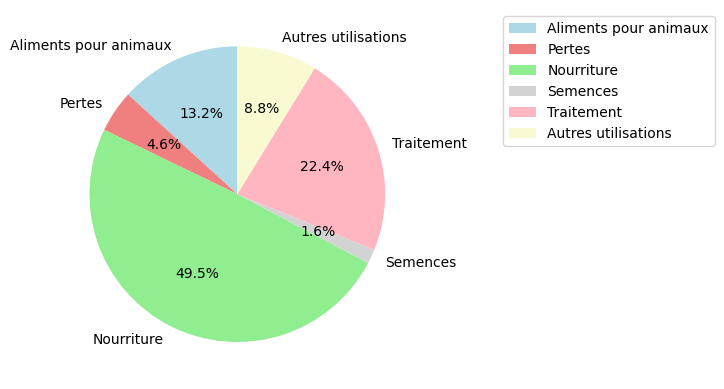

In [56]:
#Mise en forme des résultats via une représentation graphique

import matplotlib.pyplot as plt

# Valeurs
AlimentsPourAnimaux = 13.242177795029086
Pertes = 4.606457821382567
Nourriture = 49.50931413226268
Semences = 1.5704973402335405
Traitement = 22.38448852507718
AutresUtilisations = 8.782696780734788
# Labels
labels = ['Aliments pour animaux', 'Pertes','Nourriture','Semences','Traitement','Autres utilisations']

# Couleurs
couleurs = ['lightblue', 'lightcoral','lightgreen','lightgray','lightpink','lightgoldenrodyellow' ]

# Tracé du diagramme circulaire
plt.pie([AlimentsPourAnimaux,Pertes,Nourriture,Semences,Traitement,AutresUtilisations], labels=labels,autopct='%1.1f%%', colors=couleurs, startangle=90)

# Affichage du diagramme
plt.legend( bbox_to_anchor=(1.2, 1))

plt.show()

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.5 - Utilisation des céréales</h3>
</div>

In [57]:
#Création d'une liste avec toutes les variables
ListeProduits = Dispo_vegetale["Produit"].unique()

print("Liste des produits:", ListeProduits)

Liste des produits: ['Agrumes, Autres' 'Aliments pour enfants' 'Ananas' 'Bananes' 'Bière'
 'Blé' 'Boissons Alcooliques' 'Café' 'Coco (Incl Coprah)'
 'Céréales, Autres' 'Dattes' 'Edulcorants Autres' 'Feve de Cacao'
 'Fruits, Autres' 'Graines de coton' 'Graines de tournesol'
 'Huil Plantes Oleif Autr' 'Huile Graines de Coton' "Huile d'Arachide"
 "Huile d'Olive" 'Huile de Colza&Moutarde' 'Huile de Palme'
 'Huile de Soja' 'Huile de Sésame' 'Huile de Tournesol' 'Légumes, Autres'
 'Légumineuses Autres' 'Maïs' 'Miel' 'Millet' 'Miscellanees' 'Noix'
 'Olives' 'Oranges, Mandarines' 'Orge' 'Plantes Oleiferes, Autre' 'Poivre'
 'Pommes' 'Pommes de Terre' 'Raisin' 'Riz (Eq Blanchi)' 'Sucre Eq Brut'
 'Sucre, betterave' 'Sucre, canne' 'Sésame' 'Thé' 'Tomates' 'Vin'
 'Épices, Autres' 'Alcool, non Comestible' 'Arachides Decortiquees'
 'Avoine' 'Bananes plantains' 'Boissons Fermentés' 'Citrons & Limes'
 'Girofles' 'Graines Colza/Moutarde' 'Haricots' 'Huile de Coco'
 'Huile de Germe de Maïs' 'Huile de Pal

In [58]:
#Céation de la liste des céréales :
#Source : https://www.lescereales.fr/wiki-des-cereales
ListeCereales = ["Blé","Céréales, Autres","Maïs","Millet","Riz (Eq Blanchi)","Seigle","Sorgho","Orge","Avoine"]

# Boucle for et création d'un dataframe Dispo_cereales:
for Cereales in ListeCereales:

  Dispo_cereales = Dispo_vegetale[Dispo_vegetale["Produit"].isin(ListeCereales)]

Dispo_cereales


,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
7,Afghanistan,Blé,vegetale,0.0,0.0,1369.0,160.23,4.69,36.91,5992000.0,0.0,1173000.0,4895000.0,775000.0,5169000.0,322000.0,0.0,-350000.0
12,Afghanistan,"Céréales, Autres",vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32,Afghanistan,Maïs,vegetale,200000.0,0.0,21.0,2.50,0.30,0.56,313000.0,0.0,1000.0,76000.0,31000.0,312000.0,5000.0,0.0,0.0
34,Afghanistan,Millet,vegetale,0.0,0.0,3.0,0.40,0.02,0.08,13000.0,0.0,0.0,12000.0,1000.0,13000.0,0.0,0.0,0.0
40,Afghanistan,Orge,vegetale,360000.0,0.0,26.0,2.92,0.24,0.79,524000.0,0.0,10000.0,89000.0,52000.0,514000.0,22000.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15545,Îles Salomon,"Céréales, Autres",vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15568,Îles Salomon,Maïs,vegetale,0.0,0.0,1.0,0.15,0.01,0.03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15575,Îles Salomon,Orge,vegetale,0.0,0.0,0.0,0.07,0.00,0.01,1000.0,0.0,1000.0,0.0,0.0,0.0,0.0,1000.0,0.0
15591,Îles Salomon,Riz (Eq Blanchi),vegetale,0.0,12000.0,623.0,63.76,1.36,10.90,49000.0,0.0,47000.0,36000.0,1000.0,3000.0,0.0,0.0,0.0


In [59]:
#Affichage de la proportion d'alimentation animale
DispoCereales = (Dispo_cereales['Production'].sum() + Dispo_cereales['Importations - Quantité'].sum() + Dispo_cereales["Variation de stock"].sum() ) - Dispo_cereales["Exportations - Quantité"].sum()
AnimaleCereles = Dispo_cereales['Aliments pour animaux'].sum()


proportion = round( ( AnimaleCereles / DispoCereales ) * 100,1)

print("Disponibilité alimentaire mondial concernant les céréales :",AnimaleCereles)
print("Proportion des céréales dédiée à la nourriture animal :", proportion,"%")


Disponibilité alimentaire mondial concernant les céréales : 873535000.0
Proportion des céréales dédiée à la nourriture animal : 36.3 %


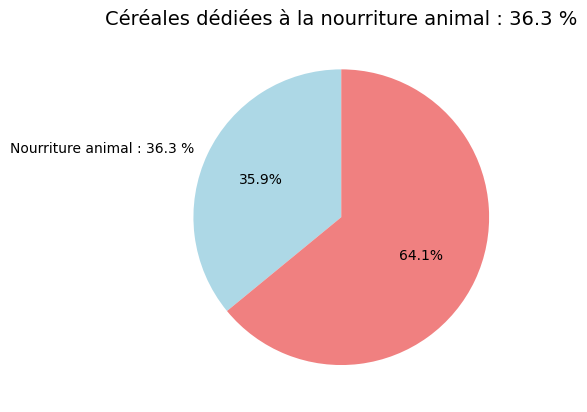

In [60]:
#Mise en forme des résultats via une représentation graphique

import matplotlib.pyplot as plt

# Valeurs
valeur1 = 36.3
valeur2 = 64.7

# Labels
labels = ['Nourriture animal : 36.3 %', '']

# Ajout d'un titre
plt.title("Céréales dédiées à la nourriture animal : 36.3 %",fontsize=14)


# Couleurs
couleurs = ['lightblue', 'lightcoral']

# Tracé du diagramme circulaire
plt.pie([valeur1, valeur2], labels=labels,autopct='%1.1f%%', colors=couleurs, startangle=90)

# Affichage du diagramme
plt.show()

In [61]:
#Affichage de la proportion d'alimentation humaine
NourritureCereales = Dispo_cereales['Nourriture'].sum()

ProportionNourritureCereales = round( ( NourritureCereales / DispoCereales ) * 100,1)
print("Proportion des céréales dédiée à l'alimentation humaine :",ProportionNourritureCereales,"%")



Proportion des céréales dédiée à l'alimentation humaine : 42.8 %


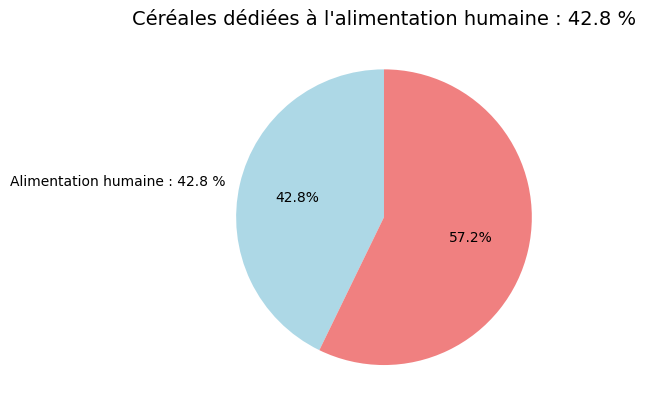

In [62]:
#Mise en forme des résultats via une représentation graphique

import matplotlib.pyplot as plt

# Valeurs
valeur1 = 42.8
valeur2 = 57.2

# Labels
labels = ["Alimentation humaine : 42.8 %", '']

# Ajout d'un titre
plt.title("Céréales dédiées à l'alimentation humaine : 42.8 %",fontsize=14)

# Couleurs
couleurs = ['lightblue', 'lightcoral']

# Tracé du diagramme circulaire
plt.pie([valeur1, valeur2], labels=labels,autopct='%1.1f%%', colors=couleurs, startangle=90)

# Affichage du diagramme
plt.show()

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.6 - Pays avec la proportion de personnes sous-alimentée la plus forte en 2017</h3>
</div>

In [63]:
#Création de la colonne proportion par pays
prop2017['proportion de personnes en état de sous-nutrition (%)'] = round(prop2017['sous_nutrition'] / prop2017['Population'],2)*100

In [64]:
#affichage après trie des 10 pires pays

prop2017 = prop2017.drop(columns = ["Année_x","Année_y"])

prop2017.sort_values(by="proportion de personnes en état de sous-nutrition (%)",ascending=False).head(10)

,Zone,Population,sous_nutrition,proportion de personnes en état de sous-nutrition (%)
78,Haïti,10982366.0,5300000.0,48.0
157,République populaire démocratique de Corée,25429825.0,12000000.0,47.0
108,Madagascar,25570512.0,10500000.0,41.0
103,Libéria,4702226.0,1800000.0,38.0
183,Tchad,15016753.0,5700000.0,38.0
100,Lesotho,2091534.0,800000.0,38.0
161,Rwanda,11980961.0,4200000.0,35.0
121,Mozambique,28649018.0,9400000.0,33.0
186,Timor-Leste,1243258.0,400000.0,32.0
0,Afghanistan,36296113.0,10500000.0,29.0


In [65]:
#Mise en forme des résultats via une représentation graphique

import plotly.express as px

# Tracer le graphique avec Plotly Express
fig = px.bar(prop2017.sort_values(by="proportion de personnes en état de sous-nutrition (%)",ascending=False).head(10), x='Zone', y='proportion de personnes en état de sous-nutrition (%)', color='Zone')

# Spécifier la plage de valeurs de l'axe y
fig.update_layout(yaxis=dict(range=[26,50]))


fig.show()

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.7 - Pays qui ont le plus bénéficié d'aide alimentaire depuis 2013</h3>
</div>

In [66]:
#calcul du total de l'aide alimentaire par pays

somme_aide_alimentaire = aide_alimentaire.groupby('Zone')['aide_alimentaire'].sum().reset_index()

somme_aide_alimentaire

,Zone,aide_alimentaire
0,Afghanistan,185452000
1,Algérie,81114000
2,Angola,5014000
3,Bangladesh,348188000
4,Bhoutan,2666000
...,...,...
71,Zambie,3026000
72,Zimbabwe,62570000
73,Égypte,1122000
74,Équateur,1362000


In [67]:
#affichage après trie des 10 pays qui ont bénéficié le plus de l'aide alimentaire
somme_aide_alimentaire.sort_values(by="aide_alimentaire",ascending=False).head(10)



,Zone,aide_alimentaire
50,République arabe syrienne,1858943000
75,Éthiopie,1381294000
70,Yémen,1206484000
61,Soudan du Sud,695248000
60,Soudan,669784000
30,Kenya,552836000
3,Bangladesh,348188000
59,Somalie,292678000
53,République démocratique du Congo,288502000
43,Niger,276344000


In [68]:
#Mise en forme des résultats via une représentation graphique

import plotly.express as px

# Tracer le graphique avec Plotly Express
fig = px.bar(somme_aide_alimentaire.sort_values(by="aide_alimentaire",ascending=False).head(10), x='Zone', y='aide_alimentaire', color='Zone')

# Spécifier la plage de valeurs de l'axe y
fig.update_layout(yaxis=dict(range=[260344000,1858943000]))


fig.show()

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.8 - Evolution des 5 pays qui ont le plus bénéficiés de l'aide alimentaire entre 2013 et 2016</h3>
</div>

In [69]:
#Création d'un dataframe avec la zone, l'année et l'aide alimentaire puis groupby sur zone et année

# Sélection des colonnes
ColonneTop5Aide = ['Zone', 'Année', 'aide_alimentaire']

# Création du DataFrame Top5_aide_alimentaire
Top5_aide_alimentaire = aide_alimentaire.loc[:, ColonneTop5Aide]

Top5_aide_alimentaire.groupby(['Zone', 'Année'])

Top5_aide_alimentaire

,Zone,Année,aide_alimentaire
0,Afghanistan,2013,682000
1,Afghanistan,2014,335000
2,Afghanistan,2013,39224000
3,Afghanistan,2014,15160000
4,Afghanistan,2013,40504000
...,...,...,...
1470,Zimbabwe,2015,96000
1471,Zimbabwe,2013,5022000
1472,Zimbabwe,2014,2310000
1473,Zimbabwe,2015,306000


In [70]:
#Création d'une liste contenant les 5 pays qui ont le plus bénéficiées de l'aide alimentaire

ListeTop5Aide = Top5_aide_alimentaire.groupby(['Zone'])[['aide_alimentaire']].sum().reset_index()
ListeTop5 = ListeTop5Aide.sort_values(by = 'aide_alimentaire', ascending = False).head(5)
ListeTop5

,Zone,aide_alimentaire
50,République arabe syrienne,1858943000
75,Éthiopie,1381294000
70,Yémen,1206484000
61,Soudan du Sud,695248000
60,Soudan,669784000


In [71]:
ListeTop5AidePays = ListeTop5["Zone"].unique()
print(ListeTop5AidePays)

['République arabe syrienne' 'Éthiopie' 'Yémen' 'Soudan du Sud' 'Soudan']


In [72]:
#On filtre sur le dataframe avec notre liste

Top5_aide_alimentaire_filtre = Top5_aide_alimentaire[Top5_aide_alimentaire['Zone'].isin(ListeTop5AidePays)]


Top5_aide_alimentaire_filtre

,Zone,Année,aide_alimentaire
354,Éthiopie,2013,170000
355,Éthiopie,2014,466000
356,Éthiopie,2015,244000
357,Éthiopie,2013,181066000
358,Éthiopie,2014,178646000
...,...,...,...
1447,Yémen,2015,1797000
1448,Yémen,2013,161000
1449,Yémen,2014,81000
1450,Yémen,2015,7617000


In [73]:
# Affichage des pays avec l'aide alimentaire par année

resultat_Top5 = Top5_aide_alimentaire_filtre.groupby(['Zone', 'Année'])['aide_alimentaire'].sum().reset_index()

resultat_Top5


,Zone,Année,aide_alimentaire
0,République arabe syrienne,2013,563566000
1,République arabe syrienne,2014,651870000
2,République arabe syrienne,2015,524949000
3,République arabe syrienne,2016,118558000
4,Soudan,2013,330230000
5,Soudan,2014,321904000
6,Soudan,2015,17650000
7,Soudan du Sud,2013,196330000
8,Soudan du Sud,2014,450610000
9,Soudan du Sud,2015,48308000


In [74]:
#Mise en forme des résultats via une représentation graphique

import plotly.express as px

# Conversion colonne 'Année' est de type chaîne de caractères
resultat_Top5['Année'] = resultat_Top5['Année'].astype(str)

# Tracer le graphique avec Plotly Express
fig = px.bar(resultat_Top5, x='Année', y='aide_alimentaire', color='Zone')


fig.show()


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.9 - Pays avec le moins de disponibilité par habitant</h3>
</div>

In [75]:
#Calcul de la disponibilité en kcal par personne par jour par pays
#Création de la colonne dispo_kcal
Pop_a_nour["dispo_cal2"] = Pop_a_nour["Disponibilité alimentaire (Kcal/personne/jour)"] * 1000

# Addition des valeurs de la colonne "dispo_kcal" avec la méthode sum() et filtre par pays dans une nouveau dataframe

Dispo_cal_pays = Pop_a_nour.groupby(['Zone'])[['dispo_cal2']].sum().reset_index()
Dispo_cal_pays




,Zone,dispo_cal2
0,Afghanistan,2087000.0
1,Afrique du Sud,3020000.0
2,Albanie,3188000.0
3,Algérie,3293000.0
4,Allemagne,3503000.0
...,...,...
167,Émirats arabes unis,3275000.0
168,Équateur,2346000.0
169,États-Unis d'Amérique,3682000.0
170,Éthiopie,2129000.0


In [76]:
#Affichage des 10 pays qui ont le moins de dispo alimentaire par personne
Dispo_cal_pays.sort_values(by = 'dispo_cal2', ascending = True).head(10)

,Zone,dispo_cal2
127,République centrafricaine,1879000.0
164,Zambie,1924000.0
91,Madagascar,2056000.0
0,Afghanistan,2087000.0
65,Haïti,2089000.0
132,République populaire démocratique de Corée,2093000.0
150,Tchad,2109000.0
165,Zimbabwe,2113000.0
114,Ouganda,2126000.0
152,Timor-Leste,2129000.0


In [77]:
#Mise en forme des résultats via une représentation graphique

import plotly.express as px

# Tracer le graphique avec Plotly Express
fig = px.bar(Dispo_cal_pays.sort_values(by = 'dispo_cal2', ascending = True).head(10), x='Zone', y='dispo_cal2', color='Zone')

# Spécifier la plage de valeurs de l'axe y
fig.update_layout(yaxis=dict(range=[1850000,2130000]))


fig.show()


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.10 - Pays avec le plus de disponibilité par habitant</h3>
</div>

In [78]:
#Affichage des 10 pays qui ont le plus de dispo alimentaire par personne
Dispo_cal_pays.sort_values(by = 'dispo_cal2', ascending = False).head(10)

,Zone,dispo_cal2
11,Autriche,3770000.0
16,Belgique,3737000.0
157,Turquie,3708000.0
169,États-Unis d'Amérique,3682000.0
74,Israël,3610000.0
72,Irlande,3602000.0
75,Italie,3578000.0
89,Luxembourg,3540000.0
166,Égypte,3518000.0
4,Allemagne,3503000.0


In [79]:
#Mise en forme des résultats via une représentation graphique

import plotly.express as px

# Tracer le graphique avec Plotly Express
fig = px.bar(Dispo_cal_pays.sort_values(by = 'dispo_cal2', ascending = False).head(10), x='Zone', y='dispo_cal2', color='Zone')

# Spécifier la plage de valeurs de l'axe y
fig.update_layout(yaxis=dict(range=[3450000,3800000]))

fig.show()


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.11 - Exemple de la Thaïlande pour le Manioc</h3>
</div>

In [80]:
# Jointure des trois dataframes en fonction de la colonne 'Zone'
Merge_dspo_pop2017 = pd.merge(dispo_alimentaire, pop2017, on='Zone')
Merge_for_thailande = pd.merge(Merge_dspo_pop2017, sou2017, on='Zone')

#création d'un dataframe avec uniquement la Thaïlande
Thailande = Merge_for_thailande.loc[Merge_for_thailande["Zone"] == "Thaïlande"]

#Suppression de colonnes inutiles

Merge_for_thailand2 = Thailande.drop(columns = ["Aliments pour animaux",	"Autres Utilisations","Pertes","Production","Disponibilité alimentaire (Kcal/personne/jour)","Disponibilité intérieure","Semences","Traitement","Variation de stock","Zone","Origine","Disponibilité alimentaire en quantité (kg/personne/an)", "Disponibilité de matière grasse en quantité (g/personne/jour)","Disponibilité de protéines en quantité (g/personne/jour)", "Année_x", "Année_y", ])

Merge_for_thailand2



,Produit,Exportations - Quantité,Importations - Quantité,Nourriture,Population,sous_nutrition
13570,Abats Comestible,5000.0,33000.0,75000.0,69209810.0,6200000.0
13571,"Agrumes, Autres",6000.0,2000.0,6000.0,69209810.0,6200000.0
13572,"Alcool, non Comestible",110000.0,21000.0,0.0,69209810.0,6200000.0
13573,Aliments pour enfants,7000.0,19000.0,12000.0,69209810.0,6200000.0
13574,Ananas,1449000.0,9000.0,671000.0,69209810.0,6200000.0
...,...,...,...,...,...,...
13660,Viande de Suides,22000.0,1000.0,871000.0,69209810.0,6200000.0
13661,Viande de Volailles,536000.0,11000.0,917000.0,69209810.0,6200000.0
13662,"Viande, Autre",96000.0,4000.0,2000.0,69209810.0,6200000.0
13663,Vin,8000.0,16000.0,8000.0,69209810.0,6200000.0


In [81]:
#Calcul de la sous nutrition en Thaïlande

Merge_for_thailand2.loc[13664,"Proportion sous_nutrition %"] = round(Merge_for_thailand2.loc[13664,"sous_nutrition"]/Merge_for_thailand2.loc[13664,"Population"]*100)

Thailandeprop = Merge_for_thailand2.loc[13664,"Proportion sous_nutrition %"]

Thailandepopu = Merge_for_thailand2.loc[13664,"Population"] / 1000000

Thailandsous = Merge_for_thailand2.loc[13664,"sous_nutrition"] / 1000000

# Affichage du nombre de personnes en état de sous-nutrition en thailande

print("La proportion de personnes en état de sous-nutrition en thailande est de",Thailandeprop,"% pour l'année 2017 \n","soit",Thailandsous,"millions de personnes en état de sous-nutrition pour une population total de",'% .3f'%Thailandepopu,"millions de personnes \n \n " )

La proportion de personnes en état de sous-nutrition en thailande est de 9.0 % pour l'année 2017 
 soit 6.2 millions de personnes en état de sous-nutrition pour une population total de  69.210 millions de personnes 
 
 


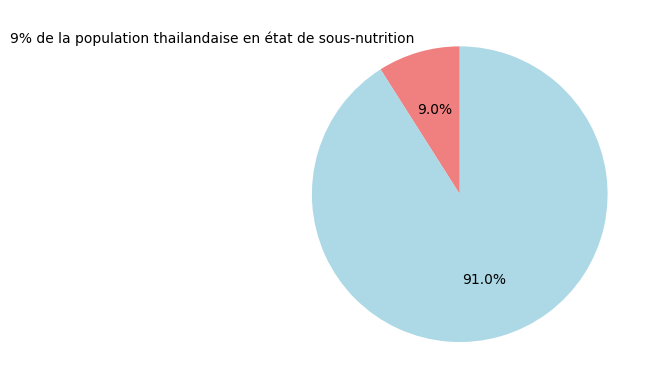

In [82]:
#Mise en forme des résultats via une représentation graphique

import matplotlib.pyplot as plt

# Valeurs
valeur1 = 9
valeur2 = 91

# Labels
labels = ["9% de la population thailandaise en état de sous-nutrition", '']

# Couleurs
couleurs = ['lightcoral','lightblue']

# Tracé du diagramme circulaire
plt.pie([valeur1, valeur2], labels=labels,autopct='%1.1f%%', colors=couleurs, startangle=90)

# Affichage du diagramme
plt.show()

In [83]:
# On calcule la proportion exportée en fonction de la proportion disponnible

Thailande_manioc =Thailande.loc[(Thailande["Produit"] == "Manioc")].reset_index()

Thailande_manioc


ThailandeDispoManioc = (Thailande_manioc["Production"].sum() + Thailande_manioc["Importations - Quantité"].sum() + Thailande_manioc["Variation de stock"].sum() ) - Thailande_manioc["Exportations - Quantité"].sum()
ThailandeProdManioc = (Thailande_manioc["Production"].sum() + Thailande_manioc["Importations - Quantité"].sum())
ThailandeManiocExport = Thailande_manioc["Exportations - Quantité"].sum()

PropThailandeManiocExport = (ThailandeManiocExport/ThailandeProdManioc)*100


print("La disponibilité interieur thailandaise de manioc est de",ThailandeDispoManioc,"tonnes en 2017 \n",'% .2f'%PropThailandeManiocExport,"% de la production thailandaise de manioc est exporté" )

La disponibilité interieur thailandaise de manioc est de 6264000.0 tonnes en 2017 
  80.10 % de la production thailandaise de manioc est exporté


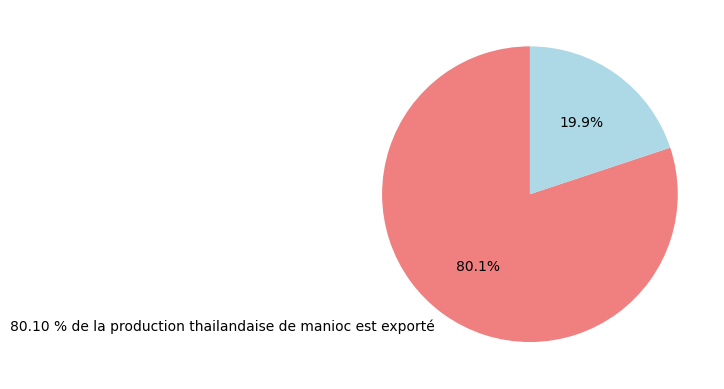

In [84]:
#Mise en forme des résultats via une représentation graphique

import matplotlib.pyplot as plt

# Valeurs
valeur1 = 80.10
valeur2 = 19.90

# Labels
labels = ["80.10 % de la production thailandaise de manioc est exporté", '']

# Couleurs
couleurs = ['lightcoral','lightblue']

# Tracé du diagramme circulaire
plt.pie([valeur1, valeur2], labels=labels,autopct='%1.1f%%', colors=couleurs, startangle=90)

# Affichage du diagramme
plt.show()

<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 6 - Analyse complémentaires</h2>
</div>

In [85]:
sous_nutrition.head(5)

,Zone,Année,sous_nutrition
0,Afghanistan,2012-2014,8600000.0
1,Afghanistan,2013-2015,8800000.0
2,Afghanistan,2014-2016,8900000.0
3,Afghanistan,2015-2017,9700000.0
4,Afghanistan,2016-2018,10500000.0


In [86]:
aide_alimentaire.head(5)

,Zone,Année,Produit,aide_alimentaire
0,Afghanistan,2013,Autres non-céréales,682000
1,Afghanistan,2014,Autres non-céréales,335000
2,Afghanistan,2013,Blé et Farin,39224000
3,Afghanistan,2014,Blé et Farin,15160000
4,Afghanistan,2013,Céréales,40504000


In [87]:
aide_alimentaire.drop(columns = "Produit")

,Zone,Année,aide_alimentaire
0,Afghanistan,2013,682000
1,Afghanistan,2014,335000
2,Afghanistan,2013,39224000
3,Afghanistan,2014,15160000
4,Afghanistan,2013,40504000
...,...,...,...
1470,Zimbabwe,2015,96000
1471,Zimbabwe,2013,5022000
1472,Zimbabwe,2014,2310000
1473,Zimbabwe,2015,306000


In [88]:
#Création d'une liste avec toutes les variables

ListeAnnée = sous_nutrition["Année"].unique()

ListeAnnéeRemplacement = ["2013","2014","2015","2016","2017","2018"]

print("Liste des années à remplacer :", ListeAnnée)
print("Liste des années de remplacement :", ListeAnnéeRemplacement)

Liste des années à remplacer : ['2012-2014' '2013-2015' '2014-2016' '2015-2017' '2016-2018' '2017-2019']
Liste des années de remplacement : ['2013', '2014', '2015', '2016', '2017', '2018']


In [89]:
#Uniformisation des années :


#Remplacement des valeurs "2012-2014" par "2013" dans la collone Année du df


sous_nutrition['Année'] = sous_nutrition['Année'].replace(ListeAnnée, ListeAnnéeRemplacement)

sous_nutrition

,Zone,Année,sous_nutrition
0,Afghanistan,2013,8600000.0
1,Afghanistan,2014,8800000.0
2,Afghanistan,2015,8900000.0
3,Afghanistan,2016,9700000.0
4,Afghanistan,2017,10500000.0
...,...,...,...
1213,Zimbabwe,2014,0.0
1214,Zimbabwe,2015,0.0
1215,Zimbabwe,2016,0.0
1216,Zimbabwe,2017,0.0


In [90]:
sous_nutrition.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Zone            1218 non-null   object 
 1   Année           1218 non-null   object 
 2   sous_nutrition  1218 non-null   float64
dtypes: float64(1), object(2)
memory usage: 28.7+ KB


In [91]:
aide_alimentaire.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1475 entries, 0 to 1474
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Zone              1475 non-null   object
 1   Année             1475 non-null   int64 
 2   Produit           1475 non-null   object
 3   aide_alimentaire  1475 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 46.2+ KB


In [92]:
#Conversion des colonnes' Année' (avec l'argument errors=coerce qui permet de convertir automatiquement les lignes qui ne sont pas des nombres en NaN)
sous_nutrition['Année'] = pd.to_numeric(sous_nutrition['Année'], errors='coerce')
aide_alimentaire['Année'] = pd.to_numeric(aide_alimentaire['Année'], errors='coerce')

In [93]:
aide_alimentaire.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1475 entries, 0 to 1474
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Zone              1475 non-null   object
 1   Année             1475 non-null   int64 
 2   Produit           1475 non-null   object
 3   aide_alimentaire  1475 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 46.2+ KB


In [94]:
sous_nutrition.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Zone            1218 non-null   object 
 1   Année           1218 non-null   int64  
 2   sous_nutrition  1218 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 28.7+ KB


In [95]:
#Pour comparer ces données nous pouvons crée un graphique visuel

#j'effectue une jointure entre les deux dataframes en fonction des colonnes 'Zone' et 'année'

Comparaison_aide_alimentaire = pd.merge(aide_alimentaire, sous_nutrition, how="inner", left_on=["Zone", "Année"], right_on=["Zone", "Année"])

Comparaison_aide_alimentaire


,Zone,Année,Produit,aide_alimentaire,sous_nutrition
0,Afghanistan,2013,Autres non-céréales,682000,8600000.0
1,Afghanistan,2013,Blé et Farin,39224000,8600000.0
2,Afghanistan,2013,Céréales,40504000,8600000.0
3,Afghanistan,2013,"Fruits secs, total",85000,8600000.0
4,Afghanistan,2013,Huiles végétales,11087000,8600000.0
...,...,...,...,...,...
1458,Zimbabwe,2015,Céréales,7053000,0.0
1459,Zimbabwe,2015,Céréales Secondaires,6957000,0.0
1460,Zimbabwe,2015,Huiles végétales,306000,0.0
1461,Zimbabwe,2015,Mélanges et préparations,96000,0.0


In [189]:
# Groupement et somme des valeurs
Comparaison_aide_alimentaire_final = Comparaison_aide_alimentaire.groupby(["Zone", "Année"])[["aide_alimentaire", "sous_nutrition"]].sum().reset_index()

# Affichage des résultats
print(Comparaison_aide_alimentaire_final)

            Zone  Année  aide_alimentaire  sous_nutrition
0    Afghanistan   2013         128238000      68800000.0
1    Afghanistan   2014          57214000      70400000.0
2        Algérie   2013          35234000      14300000.0
3        Algérie   2014          18980000      13000000.0
4        Algérie   2015          17424000      13000000.0
..           ...    ...               ...             ...
221       Égypte   2013           1122000       8800000.0
222     Équateur   2013           1362000      11500000.0
223     Éthiopie   2013         591404000     314400000.0
224     Éthiopie   2014         586624000     267300000.0
225     Éthiopie   2015         203266000     217000000.0

[226 rows x 4 columns]


In [190]:
fig = px.bar(Comparaison_aide_alimentaire_final.sort_values(by="aide_alimentaire",ascending=False).head(30),
             x='Année',
             y=['aide_alimentaire', 'sous_nutrition'],
             color_discrete_map={'aide_alimentaire': 'blue', 'sous_nutrition': 'red'},
             labels={'Aide alimentaire',"sous nutrition"},
             title='Aide alimentaire et sous-nutrition par année',
             category_orders={"Année": sorted(Comparaison_aide_alimentaire_final['Année'].unique())},
             facet_col='Zone',
             facet_col_wrap=5,  # nombre de colonnes pour afficher les zones
             height=800
            )

fig.show()

In [196]:
# Sélectionnez les 10 premières zones
zones_to_plot = Comparaison_aide_alimentaire_final['Zone'].unique()[:10]

# Filtrer le DataFrame pour inclure uniquement les zones sélectionnées
subset_df = Comparaison_aide_alimentaire_final[Comparaison_aide_alimentaire_final['Zone'].isin(zones_to_plot)]

# Créer le graphique avec les données filtrées
fig = go.Figure()

for zone in zones_to_plot:
    subset_zone = subset_df[subset_df['Zone'] == zone]

    # Tracé de la courbe pour 'sous_nutrition'
    fig.add_trace(go.Scatter(x=subset_zone['Année'],
                             y=subset_zone['sous_nutrition'],
                             mode='lines',
                             name=f'{zone} - Sous-nutrition',
                             line=dict(color='red'),
                             yaxis='y2'))

    # Tracé de la courbe pour 'aide_alimentaire'
    fig.add_trace(go.Scatter(x=subset_zone['Année'],
                             y=subset_zone['aide_alimentaire'],
                             mode='lines',
                             name=f'{zone} - Aide alimentaire',
                             line=dict(color='green'),
                             yaxis='y1'))

# Configuration des axes et du layout
fig.update_layout(title='Évolution de la sous-nutrition et de l\'aide alimentaire par zone',
                  xaxis=dict(title='Année'),
                  yaxis=dict(title='Aide alimentaire', color='green'),
                  yaxis2=dict(title='Sous-nutrition', overlaying='y', side='right', color='red'),
                  showlegend=True)

fig.show()

In [160]:
#Les études précédentes nous permettent de remarquer une différence entre les pays ayant la proportion la plus importante de personnes en état de sous-nutrition
# et les pays ayant bénéficié du plus d'aide alimentaire.

#Affichages des 10 pays avec la proportion la plus importante de personnes en état de sous-nutrition en 2017.


prop2017.sort_values(by="proportion de personnes en état de sous-nutrition (%)",ascending=False).head(10)

,Zone,Population,sous_nutrition,proportion de personnes en état de sous-nutrition (%)
78,Haïti,10982366.0,5300000.0,48.0
157,République populaire démocratique de Corée,25429825.0,12000000.0,47.0
108,Madagascar,25570512.0,10500000.0,41.0
103,Libéria,4702226.0,1800000.0,38.0
183,Tchad,15016753.0,5700000.0,38.0
100,Lesotho,2091534.0,800000.0,38.0
161,Rwanda,11980961.0,4200000.0,35.0
121,Mozambique,28649018.0,9400000.0,33.0
186,Timor-Leste,1243258.0,400000.0,32.0
0,Afghanistan,36296113.0,10500000.0,29.0


In [161]:
#Les valeurs d'aide alimentaire pour 2017 sont absentes
Aide_2017 = aide_alimentaire.loc[aide_alimentaire['Année'] == '2017']
Aide_2017

,Zone,Année,Produit,aide_alimentaire


In [162]:
#Nous utiliseront donc les pays qui ont béneficiés le plus de l'aide alimentaire entre 2012 et 2016
#affichage des 10 pays qui ont bénéficiés du plus d'aide entre 2013 et 2016 :
somme_aide_alimentaire.sort_values(by="aide_alimentaire",ascending=False).head(10)

,Zone,aide_alimentaire
50,République arabe syrienne,1858943000
75,Éthiopie,1381294000
70,Yémen,1206484000
61,Soudan du Sud,695248000
60,Soudan,669784000
30,Kenya,552836000
3,Bangladesh,348188000
59,Somalie,292678000
53,République démocratique du Congo,288502000
43,Niger,276344000


In [163]:
#Pour comparer ces données nous pouvons crée un graphique visuel

#J'effectue une jointure entre les deux dataframes en fonction de la colonne 'Zone'

Comparaison_Aide_SousN = pd.merge(somme_aide_alimentaire,prop2017,on='Zone')

Comparaison_Aide_SousN

,Zone,aide_alimentaire,Population,sous_nutrition,proportion de personnes en état de sous-nutrition (%)
0,Afghanistan,185452000,36296113.0,10500000.0,29.0
1,Algérie,81114000,41389189.0,1300000.0,3.0
2,Angola,5014000,29816766.0,5800000.0,19.0
3,Bangladesh,348188000,159685424.0,21500000.0,13.0
4,Bhoutan,2666000,745563.0,0.0,0.0
...,...,...,...,...,...
70,Zambie,3026000,16853599.0,0.0,0.0
71,Zimbabwe,62570000,14236595.0,0.0,0.0
72,Égypte,1122000,96442591.0,4600000.0,5.0
73,Équateur,1362000,16785361.0,1500000.0,9.0


In [164]:
# Je crée ensuite le visuel avec la librairie Plotlib à partir de la jointure précédente:

import plotly.express as px
df = px.data.gapminder()

fig = px.scatter(Comparaison_Aide_SousN.sort_values(by="proportion de personnes en état de sous-nutrition (%)",ascending=False).head(10), x="aide_alimentaire", y="sous_nutrition",
	         size="proportion de personnes en état de sous-nutrition (%)", color="Zone",hover_name="Zone", log_x=True, size_max=60)
fig.show()

In [ ]:
#Nous pouvons remarquer une grande disparité de l'aide alimentaire fournie en fonction des populations en sous-nutrition.
#Par exemple, la Géorgie, qui compte une population en sous-nutrition de 300 000 personnes, reçoit 70 000 Kg d'aide alimentaire.
#Dans le même temps, la Gambie, qui comporte elle aussi une population de 300 000 personnes, reçoit 13 126 000 Kg d'aide alimentaire.